# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [41]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
import scipy as sp
from skimage import io

from skimage import img_as_float
from matplotlib import cm
from skimage import img_as_ubyte
from scipy.signal import butter, lfilter, freqz, cheby1


Pretty printing has been turned OFF


## Filtering 
**1.1**

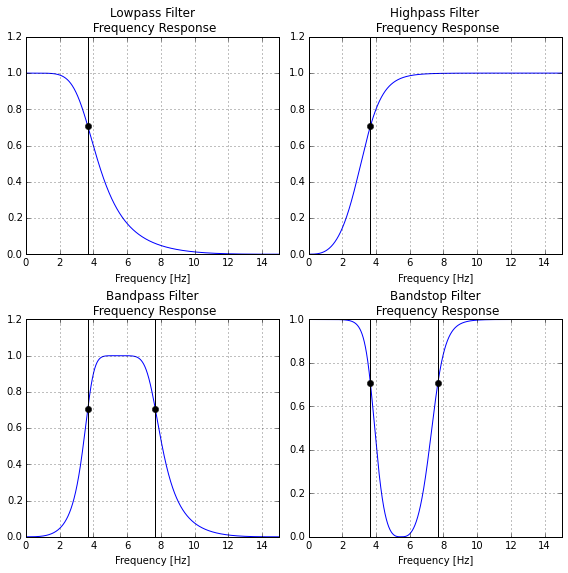

In [39]:
def butter_lowpass(cutoff, fs, order=3):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_highpass(cutoff, fs, order =3):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    d ,c = butter(order,normal_cutoff, btype ='high', analog = False)
    return d, c

def butter_bandpass(lowcut, highcut,fs, order =3):
    nyq = 0.5*fs
    low = lowcut/nyq
    high = highcut/nyq
    f,e = butter(order,[low, high], btype ='bandpass', analog = False)
    return f,e


def butter_bandstop(lowcut, highcut,fs, order =3):
    nyq = 0.5*fs
    low = lowcut/nyq
    high = highcut/nyq
    h,g = butter(order,[low, high], btype ='bandstop', analog = False)
    return h,g


#def butter_lowpass_filter(data, cutoff, fs, order=3):
#    b, a = butter_lowpass(cutoff, fs, order=order)
#    y = lfilter(b, a, data)
#    return y


# Filter requirements.
order = 3
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

#bandpass 
lowcut = 3.667
highcut = 7.667
# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)
d,c = butter_highpass(cutoff,fs,order)
f,e = butter_bandpass(lowcut,highcut,fs,order)
i,g = butter_bandstop(lowcut,highcut,fs,order)

plt.figure(figsize = (8,8))
# Plot the frequency response.
w, h = freqz(b, a, worN=8000)

plt.subplot(2, 2, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter \n Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

w, h = freqz(d, c, worN=8000)
plt.subplot(2, 2, 2)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Highpass Filter \n Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


w, h = freqz(f, e, worN=8000)
plt.subplot(2, 2, 3)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(lowcut, 0.5*np.sqrt(2), 'ko')
plt.plot(highcut, 0.5*np.sqrt(2), 'ko')
#plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
#plt.plot(x,7,'b')
plt.axvline(lowcut, color='k')
plt.axvline(highcut, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Bandpass Filter \n Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.tight_layout()

w, h = freqz(i, g, worN=8000)
plt.subplot(2, 2, 4)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(lowcut, 0.5*np.sqrt(2), 'ko')
plt.plot(highcut, 0.5*np.sqrt(2), 'ko')
#plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
#plt.plot(x,7,'b')
plt.axvline(lowcut, color='k')
plt.axvline(highcut, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Bandstop Filter \n Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.tight_layout()

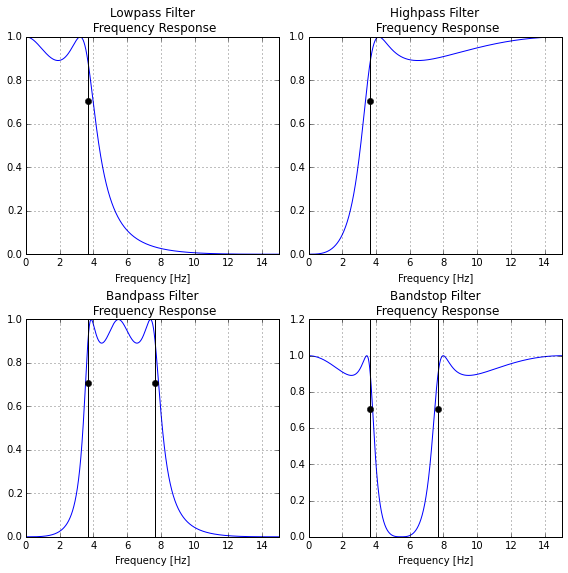

In [43]:
def cheby_lowpass(cutoff, fs, order=3):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = cheby1(order,1, normal_cutoff, btype='low', analog=False)
    return b, a

def cheby_highpass(cutoff, fs, order =3):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    d ,c = cheby1(order,1,normal_cutoff, btype ='high', analog = False)
    return d, c

def cheby_bandpass(lowcut, highcut,fs, order =3):
    nyq = 0.5*fs
    low = lowcut/nyq
    high = highcut/nyq
    f,e = cheby1(order,1,[low, high], btype ='bandpass', analog = False)
    return f,e


def cheby_bandstop(lowcut, highcut,fs, order =3):
    nyq = 0.5*fs
    low = lowcut/nyq
    high = highcut/nyq
    h,g = cheby1(order,1,[low, high], btype ='bandstop', analog = False)
    return h,g


#def butter_lowpass_filter(data, cutoff, fs, order=3):
#    b, a = butter_lowpass(cutoff, fs, order=order)
#    y = lfilter(b, a, data)
#    return y


# Filter requirements.
order = 3
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

#bandpass 
lowcut = 3.667
highcut = 7.667
# Get the filter coefficients so we can check its frequency response.
b, a = cheby_lowpass(cutoff, fs, order)
d,c = cheby_highpass(cutoff,fs,order)
f,e = cheby_bandpass(lowcut,highcut,fs,order)
i,g = cheby_bandstop(lowcut,highcut,fs,order)

plt.figure(figsize = (8,8))
# Plot the frequency response.
w, h = freqz(b, a, worN=8000)

plt.subplot(2, 2, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter \n Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

w, h = freqz(d, c, worN=8000)
plt.subplot(2, 2, 2)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Highpass Filter \n Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


w, h = freqz(f, e, worN=8000)
plt.subplot(2, 2, 3)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(lowcut, 0.5*np.sqrt(2), 'ko')
plt.plot(highcut, 0.5*np.sqrt(2), 'ko')
#plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
#plt.plot(x,7,'b')
plt.axvline(lowcut, color='k')
plt.axvline(highcut, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Bandpass Filter \n Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.tight_layout()

w, h = freqz(i, g, worN=8000)
plt.subplot(2, 2, 4)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(lowcut, 0.5*np.sqrt(2), 'ko')
plt.plot(highcut, 0.5*np.sqrt(2), 'ko')
#plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
#plt.plot(x,7,'b')
plt.axvline(lowcut, color='k')
plt.axvline(highcut, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Bandstop Filter \n Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.tight_layout()

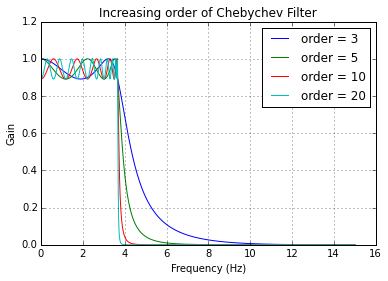

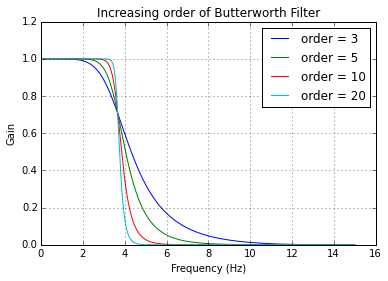

In [51]:
for order in [3, 5, 10,20]:
    b, a = cheby_lowpass(cutoff, fs, order=order)
    w, h = freqz(b, a,worN = 8000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.title('Increasing order of Chebychev Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

plt.figure()
for order in [3, 5, 10,20]:
    b, a = butter_lowpass(cutoff, fs, order=order)
    w, h = freqz(b, a, worN = 8000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.title('Increasing order of Butterworth Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

**2.2**

In [59]:
#Constructing signal 
def dirac(n=0, N=40):
    if n> N-1:
        raise ValueError('n should be inferior to N-1')
    s = np.zeros((N,))
    s[n] = 1
    return s

plt.stem(dirac(20,40))
plt.xlabel(r'$n$')
plt.ylabel(r'$\delta(k-20)$')
plt.title('Dirac function')

x = np.zeros(40)
x = dirac(20,40)
s = 1;
Ts = 2;
alpha = s*Ts
a = exp(-alpha)
y = np.zeros(40)
for i in range (0,40):
    y[k] - 2*a*y[k+1] + a**2 * y[k-2]= -s*alpha*a*x[k-1]    

SyntaxError: can't assign to operator (<ipython-input-59-989834517295>, line 22)

**2.3**

**2.4**

**3.1**

**3.2** , **3.3**

**3.4**